Le but de cet exam est de créer modèle de prédiction du contenu des images du dataset célèbre CIFAR (https://www.cs.toronto.edu/~kriz/cifar.html) qui contient 50000 images colorées de taille 32x32x3 de 10 classes 
Airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
Télécharger premièrement le dataset CIFAR sur lien https://www.cs.toronto.edu/~kriz/cifar.html


In [1]:
##
import pickle
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

1-	Importer les bibliothèques nécessaires :

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict[b'data'],np.array(dict[b'labels'])

def classes():
    with open('cifar-10-batches-py/batches.meta', 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict[b'label_names']
    

2-	Ce sont deux fonctions proposé par CIFAR pour extraire les données nécessaires ( les entrées et les labelles correspondantes), ainsi que les classes

In [3]:
data_1, labels_1 = unpickle('cifar-10-batches-py/data_batch_1')
data_2, labels_2 = unpickle('cifar-10-batches-py/data_batch_2')
data_3, labels_3 = unpickle('cifar-10-batches-py/data_batch_3')
data_4, labels_4 = unpickle('cifar-10-batches-py/data_batch_4')
data_5, labels_5 = unpickle('cifar-10-batches-py/data_batch_5')

data_test, labels_test = unpickle('cifar-10-batches-py/test_batch')

list_classes= classes()

data = np.concatenate((data_1, data_2, data_3, data_4, data_5), axis=0)
labels = np.concatenate((labels_1, labels_2, labels_3, labels_4, labels_5), axis=0)

data= data.reshape((-1,3,32,32)).transpose((0,2,3,1))
data_test = data_test.reshape((-1,3,32,32)).transpose((0,2,3,1))



Afficher les dimensions des datasets et les labelles (utiliser la fonction shape de la biblio numpy)


In [4]:
print(data.shape, labels.shape)

(50000, 32, 32, 3) (50000,)


Afficher les classes de notre problème

In [5]:
print(list_classes)

[b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']


Vérifier la validité de notre dataset on récupérant aléatoirement l’image et le label correspondant  et les afficher 

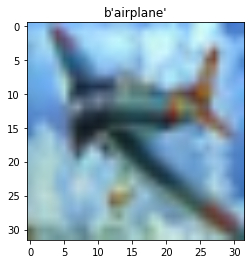

In [25]:
k= random.randrange(len(data))
image_random = data[k]
label_random = labels[k]
plt.imshow(image_random, interpolation='bilinear')
plt.title(list_classes[label_random])
plt.show()

Ce qui suit est l'examen:

Construire le modèle de convolution de deux couches de convolution de filtre 3x3 avec  64 et 128 respectivement, et deux couches de max polling de filtre 2x2, et deux couches de dense de 128 nœuds

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)
])
model.summary()
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 26)               

On procède au technique de l’augmentation de dataset par l’introduction des déformations minime du contenue des images, 
- Normalisation : on devise sur 255
- Intervalle de rotation : 30 degrés
- Décalage des images : 20%
- Déformation suivant les deux axes : 20%
- Zoom : 20%
- Miroir horizontal : True 
    

In [27]:
train_datagen = ImageDataGenerator(
    rescale=1. /255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1. /255)

Lancer l’entrainement avec la validation à chaud : 
-	15 épisodes
-	Mini Bach : 64


In [28]:
history = model.fit(
                              train_datagen.flow(data, labels, batch_size=64),
                              steps_per_epoch=len(data) /64,
                              epochs=15,
                              validation_data=validation_datagen.flow(data_test, labels_test, batch_size=64),
                              validation_steps=len(data_test) /64)

Epoch 1/15
781/781 [==============================] - 170s 217ms/step - loss: 1.9564 - accuracy: 0.2885 - val_loss: 1.4505 - val_accuracy: 0.4874
Epoch 2/15
781/781 [==============================] - 172s 220ms/step - loss: 1.5816 - accuracy: 0.4291 - val_loss: 1.2719 - val_accuracy: 0.5447
Epoch 3/15
781/781 [==============================] - 199s 255ms/step - loss: 1.4493 - accuracy: 0.4840 - val_loss: 1.3119 - val_accuracy: 0.5349
Epoch 4/15
781/781 [==============================] - 185s 237ms/step - loss: 1.3847 - accuracy: 0.5059 - val_loss: 1.1680 - val_accuracy: 0.5796
Epoch 5/15
781/781 [==============================] - 139s 178ms/step - loss: 1.3290 - accuracy: 0.5243 - val_loss: 1.1134 - val_accuracy: 0.6039
Epoch 6/15
781/781 [==============================] - 126s 161ms/step - loss: 1.2842 - accuracy: 0.5438 - val_loss: 1.1261 - val_accuracy: 0.6053
Epoch 7/15
781/781 [==============================] - 124s 159ms/step - loss: 1.2345 - accuracy: 0.5613 - val_loss: 1.0166 -

Afficher les resultats sur des graphs

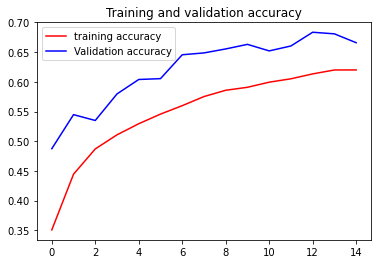

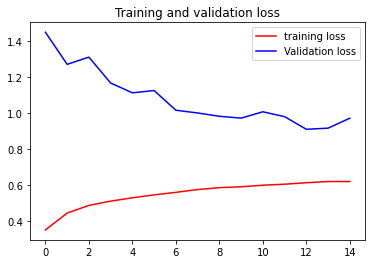

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'r', label='training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()